# Texto y anotación

Crear una buena visualización implica guiar al lector para que la figura cuente una historia.
En algunos casos, esta historia se puede contar de una manera totalmente visual, sin necesidad de agregar texto, pero en otros, son necesarias pequeñas pistas textuales y etiquetas.
Quizás los tipos más básicos de anotaciones que utilizará son las etiquetas y los títulos de los ejes, pero las opciones van más allá.
Echemos un vistazo a algunos datos y cómo podemos visualizarlos y anotarlos para ayudar a transmitir información interesante. Comenzaremos configurando el cuaderno para trazar e importar las funciones que usaremos:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Ejemplo: efecto de los días festivos en los nacimientos en EE. UU.
Volvamos a algunos datos con los que trabajamos anteriormente, en ["Ejemplo: Datos de natalidad"](03.09-Tablas-dinámicas.ipynb# Ejemplo: Datos de natalidad), donde generamos un gráfico de nacimientos promedio en el transcurso del año calendario; como ya se mencionó, estos datos se pueden descargar en https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.
Comenzaremos con el mismo procedimiento de limpieza que usamos allí y trazaremos los resultados:

In [ ]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

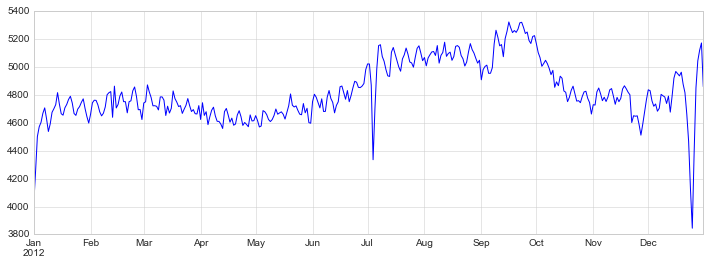

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Cuando estamos comunicando datos como este, a menudo es útil anotar ciertas características de la trama para llamar la atención del lector.
Esto se puede hacer manualmente con el comando ``plt.text``/``ax.text``, que colocará el texto en un valor x/y particular:

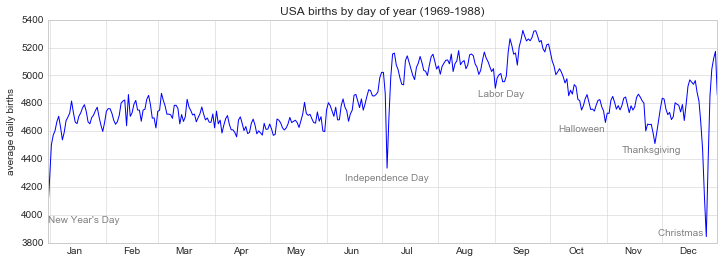

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

El método ``ax.text`` toma una posición x, una posición y, una cadena y luego palabras clave opcionales que especifican el color, el tamaño, el estilo, la alineación y otras propiedades del texto.
Aquí usamos ``ha='right'`` y ``ha='center'``, donde ``ha`` es la abreviatura de *alineación horizontal*.
Consulte la cadena de documentación de ``plt.text()`` y de ``mpl.text.Text()`` para obtener más información sobre las opciones disponibles.

## Transformaciones y posición del texto
En el ejemplo anterior, hemos anclado nuestras anotaciones de texto a ubicaciones de datos. A veces es preferible anclar el texto a una posición en los ejes o figura, independiente de los datos. En Matplotlib, esto se hace modificando la *transformación*.
Cualquier marco de visualización de gráficos necesita algún esquema para traducir entre sistemas de coordenadas.
Por ejemplo, un punto de datos en $(x, y) = (1, 1)$ debe representarse de alguna manera en una determinada ubicación de la figura, que a su vez debe representarse en píxeles en la pantalla.
Matemáticamente, tales transformaciones de coordenadas son relativamente sencillas, y Matplotlib tiene un conjunto de herramientas bien desarrollado que utiliza internamente para realizarlas (estas herramientas se pueden explorar en el submódulo ``matplotlib.transforms``).
El usuario promedio rara vez necesita preocuparse por los detalles de estas transformaciones, pero es un conocimiento útil cuando se considera la ubicación del texto en una figura. Hay tres transformaciones predefinidas que pueden ser útiles en esta situación:
- ``ax.transData``: Transformación asociada a coordenadas de datos
- ``ax.transAxes``: Transformación asociada a los ejes (en unidades de dimensiones de los ejes)
- ``fig.transFigure``: Transformación asociada a la figura (en unidades de dimensiones de la figura)
Aquí veamos un ejemplo de dibujo de texto en varios lugares usando estas transformaciones:

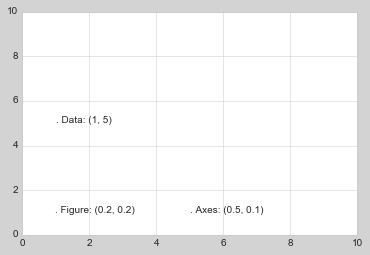

In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Tenga en cuenta que, de forma predeterminada, el texto se alinea arriba ya la izquierda de las coordenadas especificadas: aquí el "." al comienzo de cada cadena marcará aproximadamente la ubicación de las coordenadas dadas.
Las coordenadas ``transData`` dan las coordenadas de datos habituales asociadas con las etiquetas de los ejes x e y.
Las coordenadas ``transAxes`` dan la ubicación desde la esquina inferior izquierda de los ejes (aquí el cuadro blanco), como una fracción del tamaño de los ejes.
Las coordenadas ``transFigura`` son similares, pero especifican la posición desde la parte inferior izquierda de la figura (aquí el cuadro gris), como una fracción del tamaño de la figura.
Observe ahora que si cambiamos los límites de los ejes, solo las coordenadas ``transData`` se verán afectadas, mientras que las demás permanecerán estacionarias:

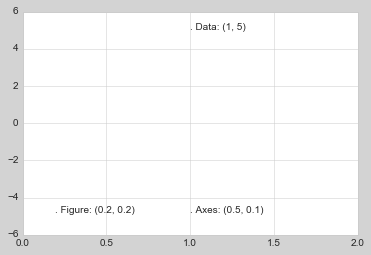

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

Este comportamiento se puede ver más claramente al cambiar los límites de los ejes de forma interactiva: si está ejecutando este código en un cuaderno, puede hacer que eso suceda cambiando ``%matplotlib inline`` a ``%matplotlib notebook`` y usando cada diagrama menú para interactuar con la trama.

## Flechas y anotaciones
Junto con las marcas de verificación y el texto, otra marca de anotación útil es la flecha simple.
Dibujar flechas en Matplotlib suele ser mucho más difícil de lo que esperas.
Si bien hay una función ``plt.arrow()`` disponible, no recomendaría usarla: las flechas que crea son objetos SVG que estarán sujetos a la relación de aspecto variable de sus gráficos, y el resultado rara vez es el mismo. el usuario pretendía.
En su lugar, sugeriría usar la función ``plt.annotate()``.
Esta función crea algo de texto y una flecha, y las flechas se pueden especificar de manera muy flexible.
Aquí usaremos ``anotar`` con varias de sus opciones:

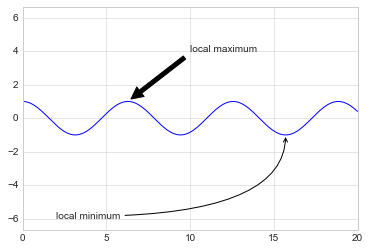

In [ ]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

El estilo de flecha se controla a través del diccionario ``arrowprops``, que tiene numerosas opciones disponibles.
Estas opciones están bastante bien documentadas en la documentación en línea de Matplotlib, por lo que en lugar de repetirlas aquí, probablemente sea más útil mostrar rápidamente algunas de las posibilidades.
Demostremos varias de las opciones posibles usando el diagrama de tasa de natalidad de antes:

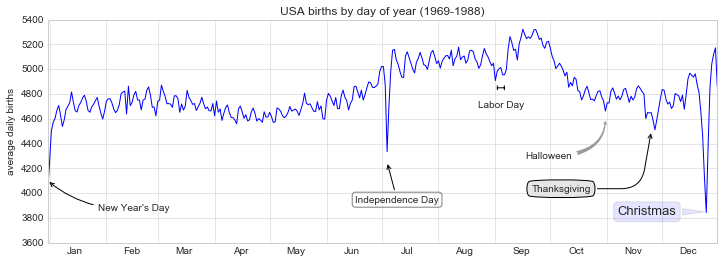

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

Notará que las especificaciones de las flechas y los cuadros de texto son muy detalladas: esto le da el poder de crear casi cualquier estilo de flecha que desee.
Desafortunadamente, también significa que este tipo de características a menudo deben ajustarse manualmente, ¡un proceso que puede llevar mucho tiempo cuando se producen gráficos con calidad de publicación!
Finalmente, señalaré que la combinación anterior de estilos no es de ninguna manera la mejor práctica para presentar datos, sino que se incluye como una demostración de algunas de las opciones disponibles.
Se pueden encontrar más discusiones y ejemplos de flechas y estilos de anotación disponibles en la galería de Matplotlib, en particular, [Anotación demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html).